In [11]:
from PIL import Image
from diffusers.utils import make_image_grid
from torchvision.transforms.functional import pil_to_tensor, to_pil_image
import numpy as np
from src.preprocess.humanparsing.run_parsing import Parsing
from src.preprocess.openpose.run_openpose import OpenPose
from src.utils.mask import get_mask_location
from src.utils.mask_v2 import Maskerv2 as Masker

In [12]:
gpu_id = 0
human_parser = Parsing(gpu_id)
openpose = OpenPose(gpu_id)
masker = Masker()

2025-01-14 10:29:51.659709928 [E:onnxruntime:Default, provider_bridge_ort.cc:1992 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1637 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.12: cannot open shared object file: No such file or directory

2025-01-14 10:29:51.659743567 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:965 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Require cuDNN 9.* and CUDA 12.*. Please install all dependencies as mentioned in the GPU requirements page (https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirements), make sure they're in the PATH, and that your GPU is supported.
2025-01-14 10:29:52.509395467 [E:onnxruntime:Default, provider_bridge_ort.cc:1992 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_

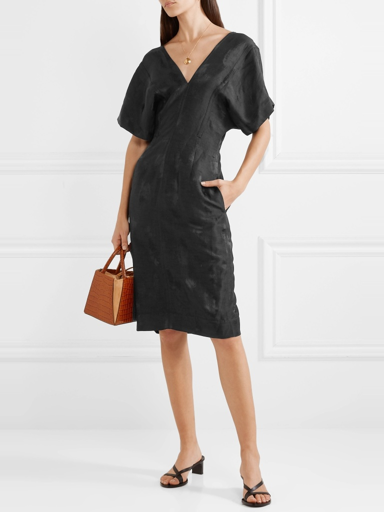

In [34]:
h, w = (512, 384)
category = 'dresses'
img = Image.open(f'/hosjiu/data/DressCode/{category}/images/052010_0.jpg').resize((w, h))
img

In [39]:
maskv1 = True

if maskv1:
    keypoints = openpose(img)[0]
    body_parse, _  = human_parser(img)
    mask, _, _, _ = get_mask_location(
        model_type='hd',
        category='dresses',
        model_parse=body_parse,
        keypoint=keypoints,
        width=w,
        height=h
    )
else:
    mask = masker.create_mask(img, 'upper_body')

100%|██████████| 1/1 [00:01<00:00,  1.56s/it]


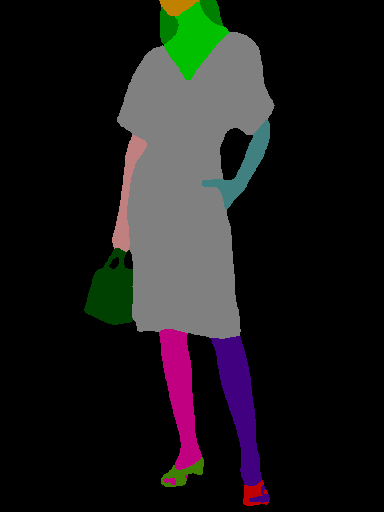

In [44]:
body_parse

In [49]:
import numpy as np
parse_array = np.array(body_parse)
np.unique(parse_array)
# parse_array[parse_array == 4]

array([ 0,  2,  7,  9, 10, 11, 12, 13, 14, 15, 16, 18], dtype=uint8)

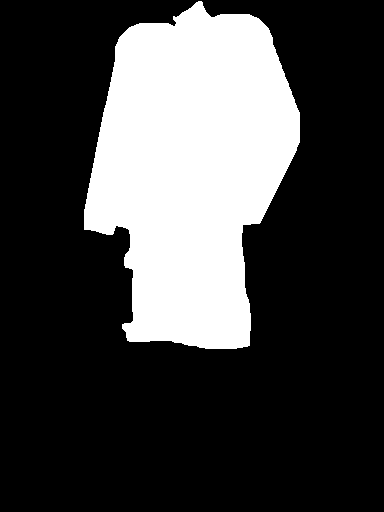

In [41]:
mask

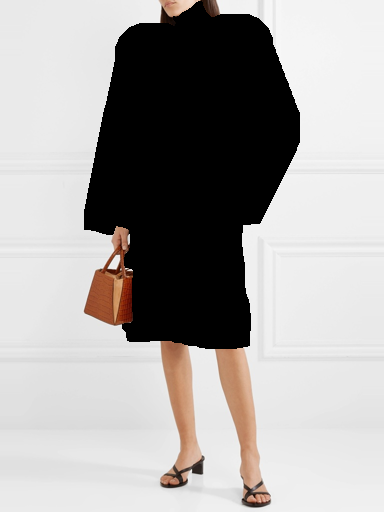

In [42]:
img_tensor = pil_to_tensor(img)
mask_tensor = pil_to_tensor(mask)
agnostic_img_tensor = img_tensor * (mask_tensor < 255)
to_pil_image(agnostic_img_tensor)